In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sprinter
import getpass

In [3]:
PLOTFILE = '/tmp/AnatomicalTracts_Full_TKO.pdf'
tko_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/AnatomicalTracts/'
tko_ext = '.vtk'

files = []#['CA', 'CC', 'CP']
for f in os.listdir(tko_dir):
    if f.endswith('vtp'):
        files.append(f.split('.')[0])
        
# files = files[0:2]

input_size = 0
for f in files:
    print(os.path.join(tko_dir, f+tko_ext), os.path.getsize(os.path.join(tko_dir, f+tko_ext)))
    input_size += os.path.getsize(os.path.join(tko_dir, f+tko_ext))
input_size /= float(len(files))

qfib_files = [(qfib_dir, f+qfib_ext) for f in files]
qfib_bits = [8, 16]
tko_files = [(tko_dir, f+tko_ext) for f in files]
tko_bits = [9,10]
dpy_files =  [(dpy_dir, f+dpy_ext) for f in files]


/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/OR_right.vtk 17275391
/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/MCP.vtk 50988755


In [9]:
runs = {}

In [12]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits,coords_only=False,  binary=False)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

In [13]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}_binary'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, coords_only=False, binary=True)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

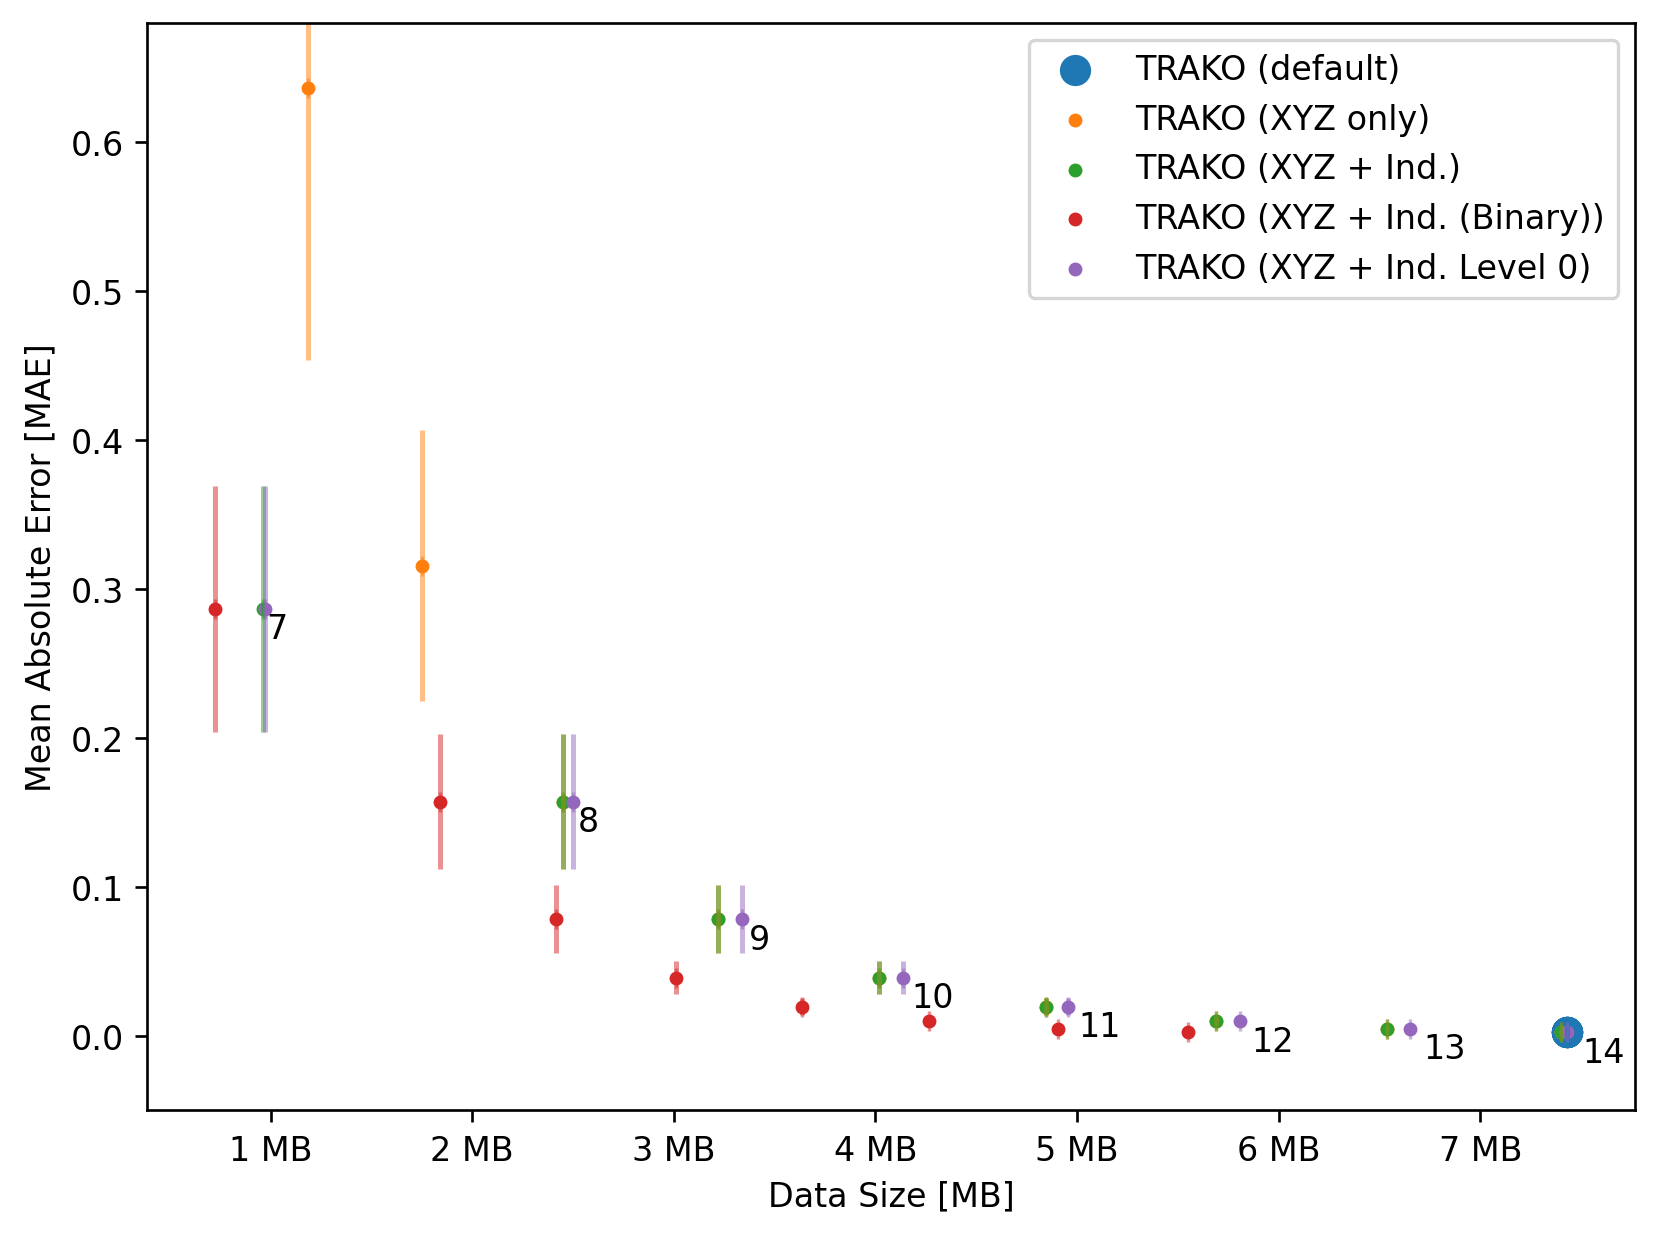

In [22]:
# sprinter.Sprinter.bitsplot(plt, tkoruns=runs, qfibruns=[qfib_sizes, qfib_errors, qfib_stds], ylim=(0,1), filename='/tmp/out.pdf')
sprinter.Sprinter.bitsplot(plt, tkoruns=runs, ylim=(-.05,.68), filename=PLOTFILE)

In [16]:
print(input_size/1000000)

34.132073


In [54]:
sprinter.Sprinter.createtable('qfib-data', input_size, runs, selector=1)

--------------------
default
size 7432218.0
ratio 78.22511981619165
c_factor 4.59244777265683
min_e 0.0
max_e 0.0048078764
mean_e 0.002448278828524053
std 0.0007026525854598731
e_min_e 0.00012302029
e_max_e 0.004733609
e_mean_e 0.0024493964156135917
e_std 0.0004030018608318642
c_time 5.572901010513306
d_time 8.297452211380005
--------------------
~~~default & 7.0 & 78.225$\times$ & 4.592\% & 0.0 & 0.005 & 0.002$\pm$0.001 & 0.0 & 0.005 & 0.002$\pm$0.0 & 5.573 & 8.297\\
--------------------
qbponly{bits}
size 4015994.0
ratio 88.23395813081731
c_factor 8.499034859115826
min_e 0.0004213471
max_e 0.07682978
mean_e 0.0391908660531044
std 0.01126435399055481
e_min_e 0.0007475347
e_max_e 0.07593721
e_mean_e 0.039188992232084274
e_std 0.006435940507799387
c_time 5.054478883743286
d_time 8.024127721786499
--------------------
~~~XYZ only & 4.0 & 88.234$\times$ & 8.499\% & 0.0 & 0.077 & 0.039$\pm$0.011 & 0.001 & 0.076 & 0.039$\pm$0.006 & 5.054 & 8.024\\
--------------------
qbi{bits}
size 4015794